# 📊 Step 1: Data Acquisition

## Objective
Download historical stock data for the **Magnificent 7** companies for our stock prediction model.

### The Magnificent 7:
| Ticker | Company |
|--------|----------|
| AAPL | Apple |
| MSFT | Microsoft |
| NVDA | NVIDIA |
| TSLA | Tesla |
| AMZN | Amazon |
| META | Meta (Facebook) |
| GOOGL | Alphabet (Google) |

### Data Source:
- **yfinance**: Historical price data (OHLCV)

---

## 1.1 Install Dependencies
Run this only the first time:

In [14]:
# Uncomment and run only the first time
# !pip install yfinance pandas numpy matplotlib seaborn plotly ta

## 1.2 Imports and Configuration

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


## 1.3 Project Configuration

We define:
- **Magnificent 7 tickers** to analyze
- **Time period** for historical data
- **Interval** (daily, weekly, etc.)

In [2]:
# ============================================
# CONFIGURATION - THE MAGNIFICENT 7
# ============================================

# The Magnificent 7 stocks
MAGNIFICENT_7 = {
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "NVDA": "NVIDIA",
    "TSLA": "Tesla",
    "AMZN": "Amazon",
    "META": "Meta",
    "GOOGL": "Google"
}

TICKERS = list(MAGNIFICENT_7.keys())

# Market indices for reference
MARKET_INDICES = [
    "^GSPC",    # S&P 500
    "^IXIC",    # NASDAQ
    "^VIX",     # Volatility Index (Fear Index)
]

# Data period
START_DATE = "2018-01-01"
END_DATE = datetime.now().strftime("%Y-%m-%d")

# Interval: "1d" (daily), "1wk" (weekly), "1mo" (monthly)
INTERVAL = "1d"

print("📈 THE MAGNIFICENT 7")
print("=" * 40)
for ticker, name in MAGNIFICENT_7.items():
    print(f"   {ticker}: {name}")
print("=" * 40)
print(f"📅 Period: {START_DATE} to {END_DATE}")
print(f"⏱️ Interval: {INTERVAL}")

📈 THE MAGNIFICENT 7
   AAPL: Apple
   MSFT: Microsoft
   NVDA: NVIDIA
   TSLA: Tesla
   AMZN: Amazon
   META: Meta
   GOOGL: Google
📅 Period: 2018-01-01 to 2026-01-16
⏱️ Interval: 1d


## 1.4 Download Stock Data Functions

In [3]:
def download_stock_data(ticker: str, start: str, end: str, interval: str = "1d") -> pd.DataFrame:
    """
    Download historical data for a ticker using yfinance.
    
    Args:
        ticker: Stock symbol (e.g., 'AAPL')
        start: Start date (YYYY-MM-DD)
        end: End date (YYYY-MM-DD)
        interval: Time interval
    
    Returns:
        DataFrame with OHLCV data
    """
    print(f"⏳ Downloading {ticker}...")
    
    stock = yf.Ticker(ticker)
    df = stock.history(start=start, end=end, interval=interval)
    
    if df.empty:
        raise ValueError(f"No data retrieved for {ticker}")
    
    # Clean column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize(None)  # Remove timezone for simplicity
    
    print(f"✅ Downloaded {len(df)} records for {ticker}")
    
    return df

In [4]:
def download_magnificent_7(tickers: list, start: str, end: str, interval: str = "1d") -> dict:
    """
    Download data for all Magnificent 7 stocks.
    
    Returns:
        Dictionary with ticker as key and DataFrame as value
    """
    all_data = {}
    
    print("🚀 Downloading Magnificent 7 stocks...\n")
    
    for ticker in tickers:
        try:
            df = download_stock_data(ticker, start, end, interval)
            all_data[ticker] = df
        except Exception as e:
            print(f"⚠️ Error downloading {ticker}: {e}")
    
    print(f"\n✅ Successfully downloaded {len(all_data)}/{len(tickers)} stocks")
    return all_data

## 1.5 Download Magnificent 7 Data

In [5]:
# Download all Magnificent 7 stocks
mag7_data = download_magnificent_7(TICKERS, START_DATE, END_DATE, INTERVAL)

🚀 Downloading Magnificent 7 stocks...

⏳ Downloading AAPL...
✅ Downloaded 2021 records for AAPL
⏳ Downloading MSFT...
✅ Downloaded 2021 records for MSFT
⏳ Downloading NVDA...
✅ Downloaded 2021 records for NVDA
⏳ Downloading TSLA...
✅ Downloaded 2021 records for TSLA
⏳ Downloading AMZN...
✅ Downloaded 2021 records for AMZN
⏳ Downloading META...
✅ Downloaded 2021 records for META
⏳ Downloading GOOGL...
✅ Downloaded 2021 records for GOOGL

✅ Successfully downloaded 7/7 stocks


In [6]:
# Quick look at the data structure
print("\n📋 Dataset Information:")
print("=" * 50)
for ticker, df in mag7_data.items():
    print(f"{ticker}: {len(df)} records | {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")

# Show sample data from first ticker
sample_ticker = TICKERS[0]
print(f"\n📊 Sample data ({sample_ticker}):")
mag7_data[sample_ticker].head()


📋 Dataset Information:
AAPL: 2021 records | 2018-01-02 to 2026-01-15
MSFT: 2021 records | 2018-01-02 to 2026-01-15
NVDA: 2021 records | 2018-01-02 to 2026-01-15
TSLA: 2021 records | 2018-01-02 to 2026-01-15
AMZN: 2021 records | 2018-01-02 to 2026-01-15
META: 2021 records | 2018-01-02 to 2026-01-15
GOOGL: 2021 records | 2018-01-02 to 2026-01-15

📊 Sample data (AAPL):


,open,high,low,close,volume,dividends,stock_splits
Date,,,,,,,
2018-01-02,39.85,40.35,39.64,40.34,102223600,0.00,0.00
2018-01-03,40.41,40.88,40.27,40.33,118071600,0.00,0.00
2018-01-04,40.41,40.63,40.30,40.52,89738400,0.00,0.00
2018-01-05,40.62,41.07,40.53,40.98,94640000,0.00,0.00
2018-01-08,40.83,41.13,40.73,40.83,82271200,0.00,0.00


## 1.6 Create Combined DataFrame

Create a unified DataFrame with closing prices for all stocks.

In [7]:
# Create a DataFrame with all closing prices
close_prices = pd.DataFrame()

for ticker, df in mag7_data.items():
    close_prices[ticker] = df['close']

# Drop any rows with missing values
close_prices = close_prices.dropna()

print(f"📊 Combined close prices shape: {close_prices.shape}")
print(f"📅 Date range: {close_prices.index.min().strftime('%Y-%m-%d')} to {close_prices.index.max().strftime('%Y-%m-%d')}")
close_prices.head(10)

📊 Combined close prices shape: (2021, 7)
📅 Date range: 2018-01-02 to 2026-01-15


,AAPL,MSFT,NVDA,TSLA,AMZN,META,GOOGL
Date,,,,,,,
2018-01-02,40.34,79.05,4.93,21.37,59.45,180.16,53.26
2018-01-03,40.33,79.42,5.25,21.15,60.21,183.39,54.17
2018-01-04,40.52,80.12,5.28,20.97,60.48,183.05,54.38
2018-01-05,40.98,81.11,5.33,21.11,61.46,185.55,55.10
2018-01-08,40.83,81.19,5.49,22.43,62.34,186.97,55.29
2018-01-09,40.83,81.14,5.49,22.25,62.63,186.57,55.22
2018-01-10,40.82,80.77,5.53,22.32,62.72,186.54,55.09
2018-01-11,41.05,81.01,5.54,22.53,63.83,186.47,55.19
2018-01-12,41.47,82.41,5.51,22.41,65.26,178.13,56.11


## 1.7 Download Market Indices

In [8]:
# Download market indices
print("📊 Downloading market indices...\n")

indices_data = {}
for idx in MARKET_INDICES:
    try:
        df = download_stock_data(idx, START_DATE, END_DATE, INTERVAL)
        clean_name = idx.replace('^', '')
        indices_data[clean_name] = df['close']
    except Exception as e:
        print(f"⚠️ Error downloading {idx}: {e}")

df_indices = pd.DataFrame(indices_data)
print(f"\n✅ Downloaded {len(df_indices.columns)} indices")
df_indices.head()

📊 Downloading market indices...

⏳ Downloading ^GSPC...
✅ Downloaded 2021 records for ^GSPC
⏳ Downloading ^IXIC...
✅ Downloaded 2021 records for ^IXIC
⏳ Downloading ^VIX...
✅ Downloaded 2021 records for ^VIX

✅ Downloaded 3 indices


,GSPC,IXIC,VIX
Date,,,
2018-01-02,2695.81,7006.90,9.77
2018-01-03,2713.06,7065.53,9.15
2018-01-04,2723.99,7077.91,9.22
2018-01-05,2743.15,7136.56,9.22
2018-01-08,2747.71,7157.39,9.52


## 1.8 Get Company Information

In [9]:
def get_company_info(ticker: str) -> dict:
    """Get fundamental information for a company."""
    stock = yf.Ticker(ticker)
    info = stock.info
    
    return {
        'Ticker': ticker,
        'Name': info.get('longName', 'N/A'),
        'Sector': info.get('sector', 'N/A'),
        'Industry': info.get('industry', 'N/A'),
        'Market Cap ($B)': round(info.get('marketCap', 0) / 1e9, 2),
        'P/E Ratio': round(info.get('trailingPE', 0), 2) if info.get('trailingPE') else 'N/A',
        '52W High': info.get('fiftyTwoWeekHigh', 'N/A'),
        '52W Low': info.get('fiftyTwoWeekLow', 'N/A')
    }

In [10]:
# Get information for all Magnificent 7
print("🏢 Getting company information...\n")

company_info = []
for ticker in TICKERS:
    try:
        info = get_company_info(ticker)
        company_info.append(info)
        print(f"✅ {ticker}: {info['Name']}")
    except Exception as e:
        print(f"⚠️ Error getting info for {ticker}: {e}")

df_info = pd.DataFrame(company_info)
df_info

🏢 Getting company information...

✅ AAPL: Apple Inc.
✅ MSFT: Microsoft Corporation
✅ NVDA: NVIDIA Corporation
✅ TSLA: Tesla, Inc.
✅ AMZN: Amazon.com, Inc.
✅ META: Meta Platforms, Inc.
✅ GOOGL: Alphabet Inc.


,Ticker,Name,Sector,Industry,Market Cap ($B),P/E Ratio,52W High,52W Low
0,AAPL,Apple Inc.,Technology,Consumer Electronics,3815.40,34.61,288.62,169.21
1,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,3394.43,32.46,555.45,344.79
2,NVDA,NVIDIA Corporation,Technology,Semiconductors,4554.11,46.30,212.19,86.62
3,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,1458.60,302.46,498.83,214.25
4,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,2546.20,33.69,258.60,161.38
5,META,"Meta Platforms, Inc.",Communication Services,Internet Content & Information,1564.74,27.47,796.25,479.80
6,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,4030.67,32.88,340.49,140.53


## 1.9 Data Visualization

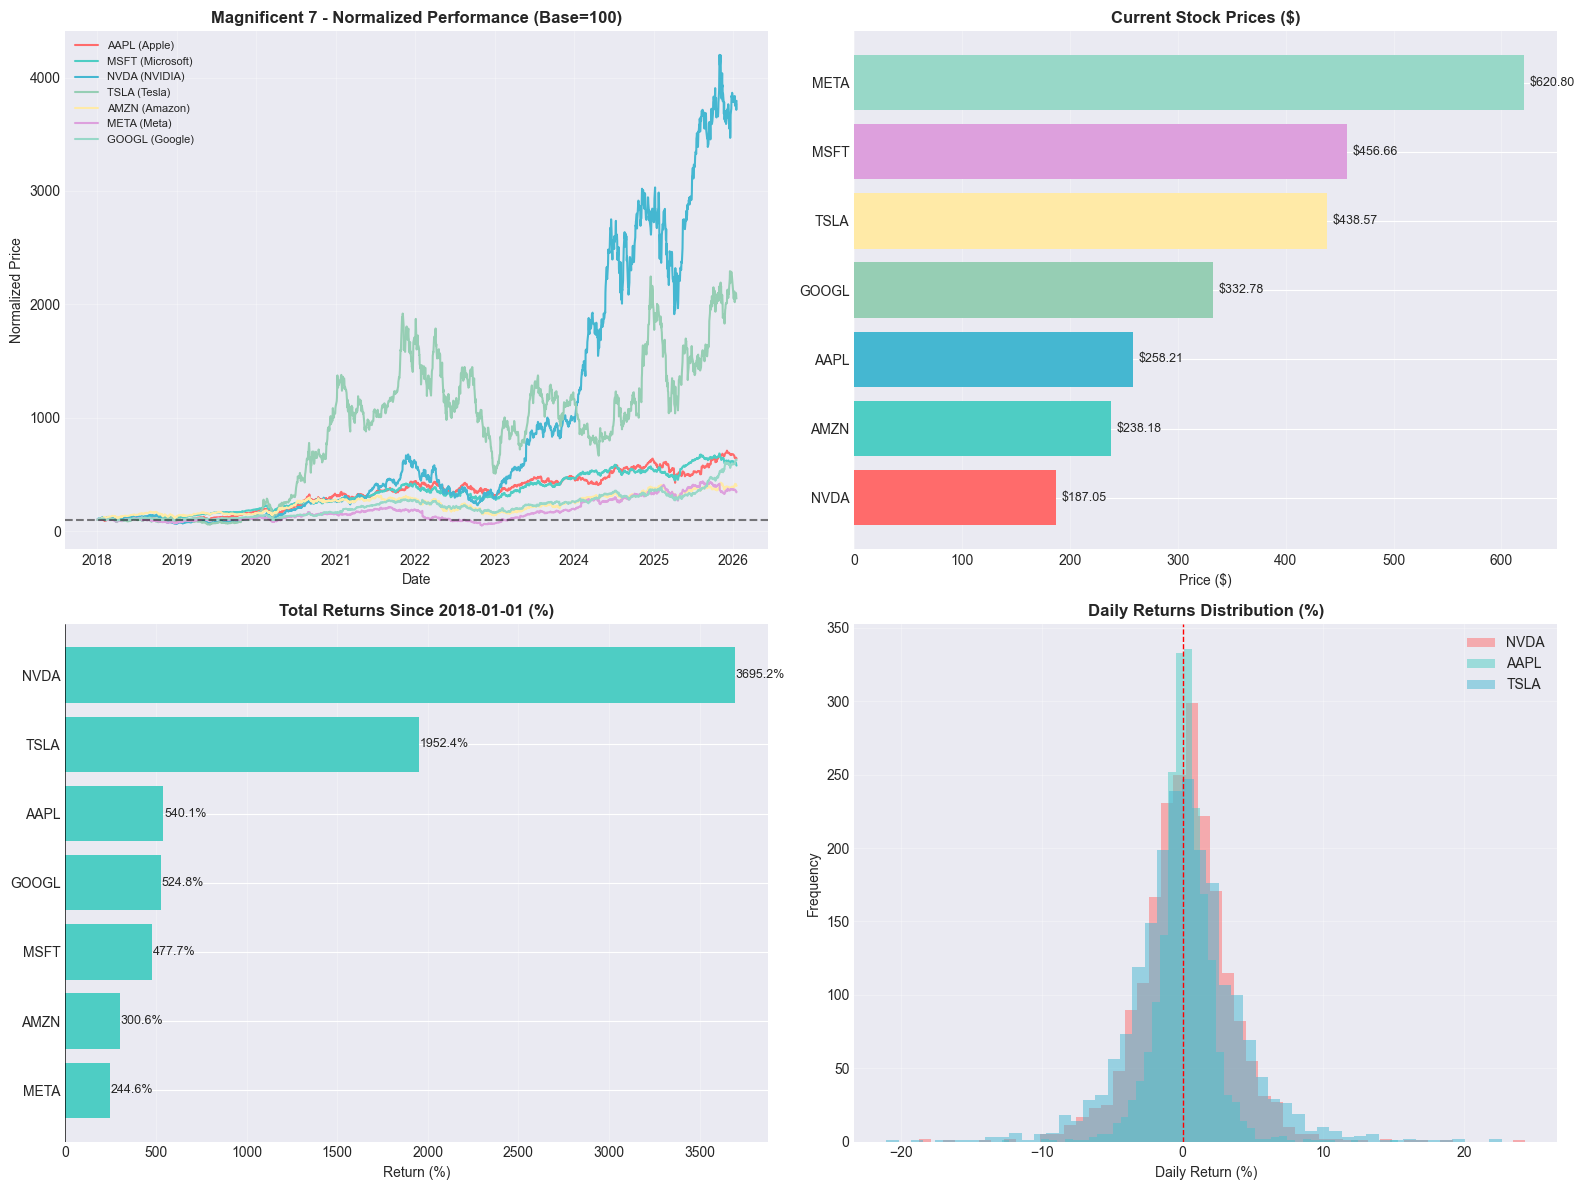

📊 Visualization saved to data/raw/magnificent7_overview.png


In [11]:
# Normalize prices to compare performance (base = 100)
normalized_prices = close_prices / close_prices.iloc[0] * 100

# Plot normalized prices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# 1. Normalized Performance Comparison
ax1 = axes[0, 0]
for i, ticker in enumerate(TICKERS):
    ax1.plot(normalized_prices.index, normalized_prices[ticker], 
             label=f"{ticker} ({MAGNIFICENT_7[ticker]})", 
             linewidth=1.5, color=colors[i])
ax1.set_title('Magnificent 7 - Normalized Performance (Base=100)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Price')
ax1.legend(loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# 2. Current Prices
ax2 = axes[0, 1]
latest_prices = close_prices.iloc[-1].sort_values(ascending=True)
bars = ax2.barh(latest_prices.index, latest_prices.values, color=colors[:len(latest_prices)])
ax2.set_title('Current Stock Prices ($)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Price ($)')
for bar, price in zip(bars, latest_prices.values):
    ax2.text(price + 5, bar.get_y() + bar.get_height()/2, f'${price:.2f}', va='center', fontsize=9)
ax2.grid(True, alpha=0.3, axis='x')

# 3. Total Returns
ax3 = axes[1, 0]
total_returns = ((close_prices.iloc[-1] / close_prices.iloc[0]) - 1) * 100
total_returns = total_returns.sort_values(ascending=True)
colors_returns = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in total_returns]
bars = ax3.barh(total_returns.index, total_returns.values, color=colors_returns)
ax3.set_title(f'Total Returns Since {START_DATE} (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Return (%)')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for bar, ret in zip(bars, total_returns.values):
    ax3.text(ret + 5, bar.get_y() + bar.get_height()/2, f'{ret:.1f}%', va='center', fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# 4. Daily Returns Distribution (example with NVDA)
ax4 = axes[1, 1]
for i, ticker in enumerate(['NVDA', 'AAPL', 'TSLA']):
    returns = close_prices[ticker].pct_change() * 100
    ax4.hist(returns.dropna(), bins=50, alpha=0.5, label=ticker, color=colors[i])
ax4.axvline(x=0, color='red', linestyle='--', linewidth=1)
ax4.set_title('Daily Returns Distribution (%)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Daily Return (%)')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/raw/magnificent7_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Visualization saved to data/raw/magnificent7_overview.png")

## 1.10 Save Raw Data

In [12]:
import json

# Save individual stock data
print("💾 Saving data files...\n")

for ticker, df in mag7_data.items():
    filepath = f"../data/raw/{ticker}_raw.csv"
    df.to_csv(filepath)
    print(f"✅ Saved: {filepath}")

# Save combined close prices
close_prices.to_csv("../data/raw/magnificent7_close_prices.csv")
print(f"✅ Saved: data/raw/magnificent7_close_prices.csv")

# Save market indices
df_indices.to_csv("../data/raw/market_indices.csv")
print(f"✅ Saved: data/raw/market_indices.csv")

# Save company info
df_info.to_csv("../data/raw/company_info.csv", index=False)
print(f"✅ Saved: data/raw/company_info.csv")

# Save configuration
config = {
    'project': 'Magnificent 7 Stock Prediction',
    'tickers': TICKERS,
    'ticker_names': MAGNIFICENT_7,
    'market_indices': MARKET_INDICES,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'interval': INTERVAL,
    'download_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'records_per_stock': {ticker: len(df) for ticker, df in mag7_data.items()}
}

with open('../data/raw/config.json', 'w') as f:
    json.dump(config, f, indent=2)
print(f"✅ Saved: data/raw/config.json")

💾 Saving data files...

✅ Saved: ../data/raw/AAPL_raw.csv
✅ Saved: ../data/raw/MSFT_raw.csv
✅ Saved: ../data/raw/NVDA_raw.csv
✅ Saved: ../data/raw/TSLA_raw.csv
✅ Saved: ../data/raw/AMZN_raw.csv
✅ Saved: ../data/raw/META_raw.csv
✅ Saved: ../data/raw/GOOGL_raw.csv
✅ Saved: data/raw/magnificent7_close_prices.csv
✅ Saved: data/raw/market_indices.csv
✅ Saved: data/raw/company_info.csv
✅ Saved: data/raw/config.json


## 1.11 Summary and Next Steps

### ✅ What we accomplished:
1. Downloaded historical data for all 7 Magnificent stocks
2. Downloaded market indices (S&P 500, NASDAQ, VIX)
3. Retrieved fundamental company information
4. Created performance visualizations
5. Saved all data in CSV format

### 📋 Data obtained:
- **OHLCV**: Open, High, Low, Close, Volume for each stock
- **Dividends and Stock Splits** (if applicable)
- **Market indices** for correlation analysis

### ➡️ Next Step: EDA (Exploratory Data Analysis)
In notebook `02_eda.ipynb` we will analyze:
- Distributions and statistics
- Correlations between stocks
- Seasonality patterns
- Anomalies and outliers
- Volatility analysis

In [13]:
# Final summary
print("=" * 60)
print("📊 DATA ACQUISITION SUMMARY")
print("=" * 60)
print(f"\n🎯 Project: Magnificent 7 Stock Prediction")
print(f"📅 Period: {START_DATE} to {END_DATE}")
print(f"\n📈 Stocks downloaded:")
for ticker, name in MAGNIFICENT_7.items():
    records = len(mag7_data[ticker])
    print(f"   {ticker} ({name}): {records:,} records")
print(f"\n📊 Market indices: {len(df_indices.columns)}")
print(f"\n💾 Files saved in data/raw/:")
print(f"   - 7 individual stock files (*_raw.csv)")
print(f"   - magnificent7_close_prices.csv")
print(f"   - market_indices.csv")
print(f"   - company_info.csv")
print(f"   - config.json")
print(f"\n✅ Step 1 completed! Continue with 02_eda.ipynb")
print("=" * 60)

📊 DATA ACQUISITION SUMMARY

🎯 Project: Magnificent 7 Stock Prediction
📅 Period: 2018-01-01 to 2026-01-16

📈 Stocks downloaded:
   AAPL (Apple): 2,021 records
   MSFT (Microsoft): 2,021 records
   NVDA (NVIDIA): 2,021 records
   TSLA (Tesla): 2,021 records
   AMZN (Amazon): 2,021 records
   META (Meta): 2,021 records
   GOOGL (Google): 2,021 records

📊 Market indices: 3

💾 Files saved in data/raw/:
   - 7 individual stock files (*_raw.csv)
   - magnificent7_close_prices.csv
   - market_indices.csv
   - company_info.csv
   - config.json

✅ Step 1 completed! Continue with 02_eda.ipynb
